In [15]:
import sys
import os
import typing as tp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parent.parent  

base_data_dir = project_root / 'data'
data_dir = base_data_dir / 'processed'
plots_dir = project_root / 'results' / 'plots'

# Check if the directories exist
print(f"Data directory exists: {data_dir.exists()}")
print(f"Plots directory exists: {plots_dir.exists()}")


Data directory exists: True
Plots directory exists: True


In [22]:
state_file = data_dir / 'state_variables.csv'
if state_file.exists():
    state_df = pd.read_csv(state_file)
    print(state_df.head())
else:
    print(f"State data not found at {state_file}")

   IndustryGrowth  LeaseLength  RSFOccupied  OccupancyRate  \
0        0.025830          5.0  2448.550839       0.653912   
1       -0.072727          5.0  1809.951624       0.888305   
2       -0.009860          7.0  1386.764369       0.747356   
3        0.000000         15.0  3520.418384       0.534051   
4        0.012195          5.0  2413.599103       0.604724   

   IncentivesAvailable  EconomicIndicator  VacancyRate  
0                  0.0                1.0         0.05  
1                  1.0                0.0         0.10  
2                  0.0                1.0         0.05  
3                  0.0                1.0         0.05  
4                  1.0                0.0         0.10  


In [23]:
state_df

,IndustryGrowth,LeaseLength,RSFOccupied,OccupancyRate,IncentivesAvailable,EconomicIndicator,VacancyRate
0,0.025830,5.0,2448.550839,0.653912,0.0,1.0,0.05
1,-0.072727,5.0,1809.951624,0.888305,1.0,0.0,0.10
2,-0.009860,7.0,1386.764369,0.747356,0.0,1.0,0.05
3,0.000000,15.0,3520.418384,0.534051,0.0,1.0,0.05
4,0.012195,5.0,2413.599103,0.604724,1.0,0.0,0.10
...,...,...,...,...,...,...,...
495,0.010309,15.0,1810.545995,0.790409,1.0,1.0,0.05
496,0.025641,5.0,1717.332490,0.928063,1.0,0.0,0.10
497,0.014085,15.0,2951.724496,0.802313,2.0,1.0,0.05
498,0.024793,15.0,1187.289209,0.645526,1.0,-1.0,0.20


In [16]:
leases_file = data_dir / 'leases_df.csv'

# Load the leases_df
if leases_file.exists():
    leases_df = pd.read_csv(leases_file)
    print(leases_df.head())
else:
    print(f"Lease data not found at {leases_file}")

   LeaseID  TenantID  StartYear  LeaseYear  FloorLevel SuiteID  \
0      1.0       1.0       1990       1990          25    25_1   
1      2.0       2.0       1990       1990          25    25_1   
2      3.0       2.0       1990       1990          28    28_2   
3      4.0       3.0       1990       1990          28    28_2   
4      5.0       4.0       1990       1990          28    28_2   

   SuiteSquareFootage  RentAmount  AnnualRent  Occupied  VacantSpace  
0         2008.314230        14.0    28116.40      True     17991.69  
1         2008.314230        14.0    28116.40      True     17991.69  
2         1867.538778        14.0    26145.54      True     18132.46  
3         1867.538778        14.0    26145.54      True     18132.46  
4         1867.538778        14.0    26145.54      True     18132.46  


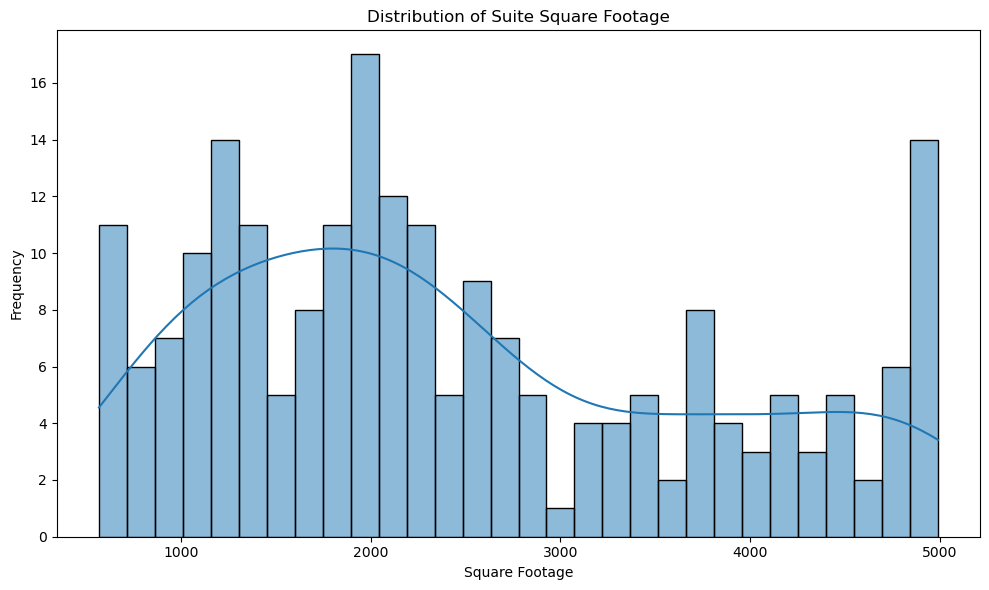

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Suite Square Footage
plt.figure(figsize=(10, 6))
sns.histplot(leases_df['SuiteSquareFootage'], bins=30, kde=True)
plt.title('Distribution of Suite Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

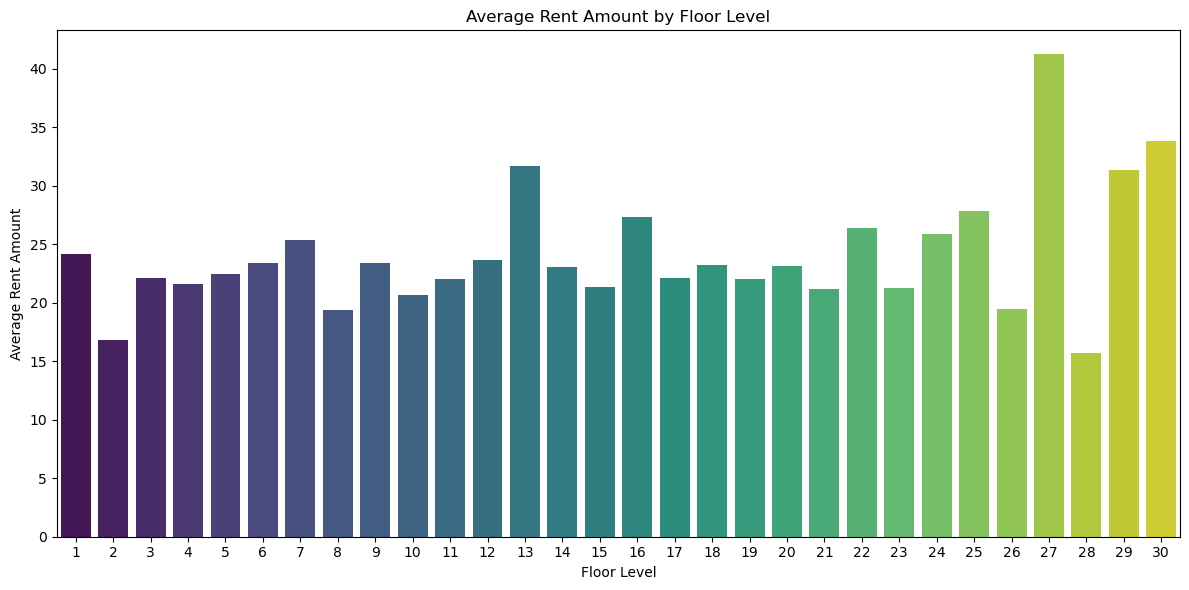

In [18]:
# Average Rent Amount by Floor Level
avg_rent_by_floor = leases_df.groupby('FloorLevel')['RentAmount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rent_by_floor, x='FloorLevel', y='RentAmount', palette='viridis')
plt.title('Average Rent Amount by Floor Level')
plt.xlabel('Floor Level')
plt.ylabel('Average Rent Amount')
plt.tight_layout()
plt.show()


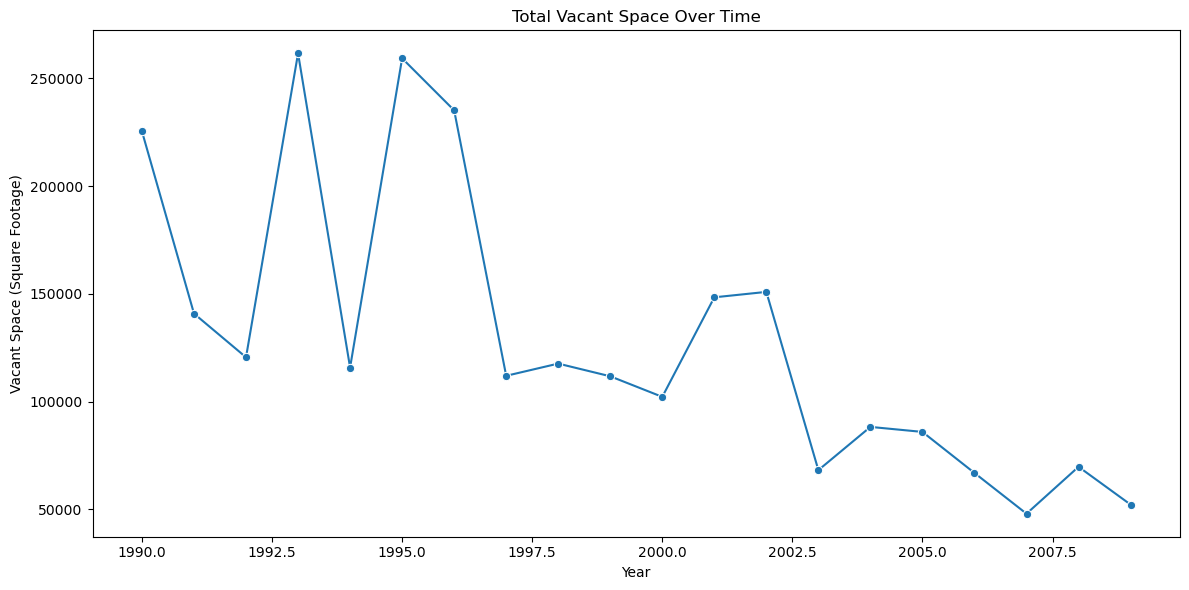

In [19]:
# Vacant Space Over Time
vacant_space_over_time = leases_df.groupby('LeaseYear')['VacantSpace'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=vacant_space_over_time, x='LeaseYear', y='VacantSpace', marker='o')
plt.title('Total Vacant Space Over Time')
plt.xlabel('Year')
plt.ylabel('Vacant Space (Square Footage)')
plt.tight_layout()
plt.show()

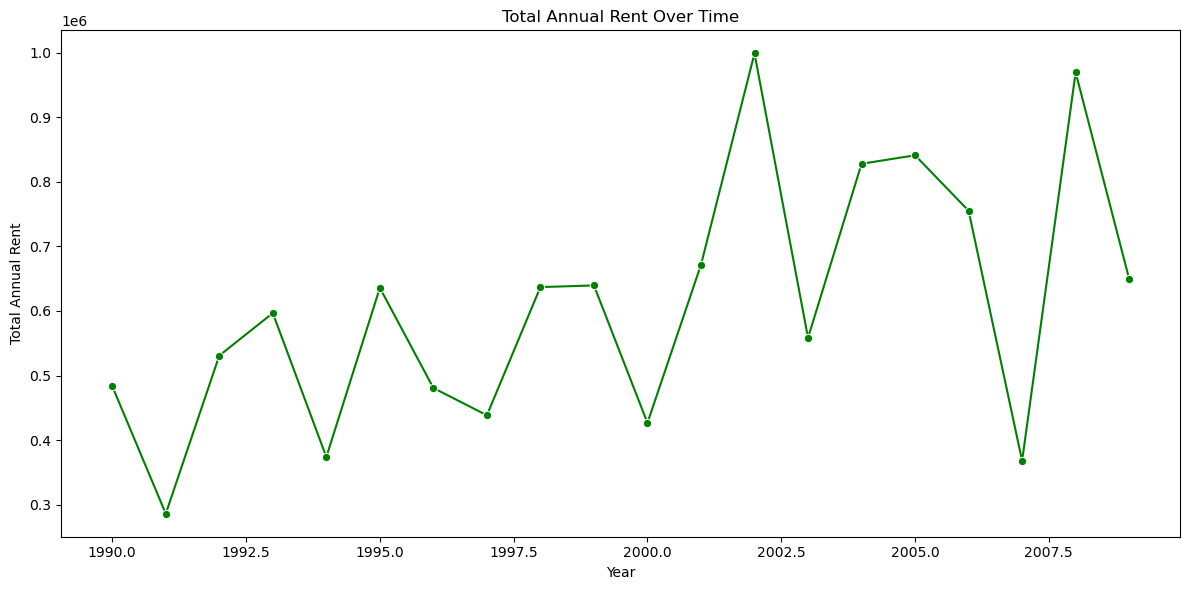

In [20]:
# Total Annual Rent Over Time
total_annual_rent = leases_df.groupby('LeaseYear')['AnnualRent'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_annual_rent, x='LeaseYear', y='AnnualRent', marker='o', color='green')
plt.title('Total Annual Rent Over Time')
plt.xlabel('Year')
plt.ylabel('Total Annual Rent')
plt.tight_layout()
plt.show()

/var/folders/vl/zg5d018d5b7b963x6477rn7w0000gn/T/ipykernel_46101/3334609186.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(leases_df.corr(), annot=True, cmap='coolwarm')


<AxesSubplot: >

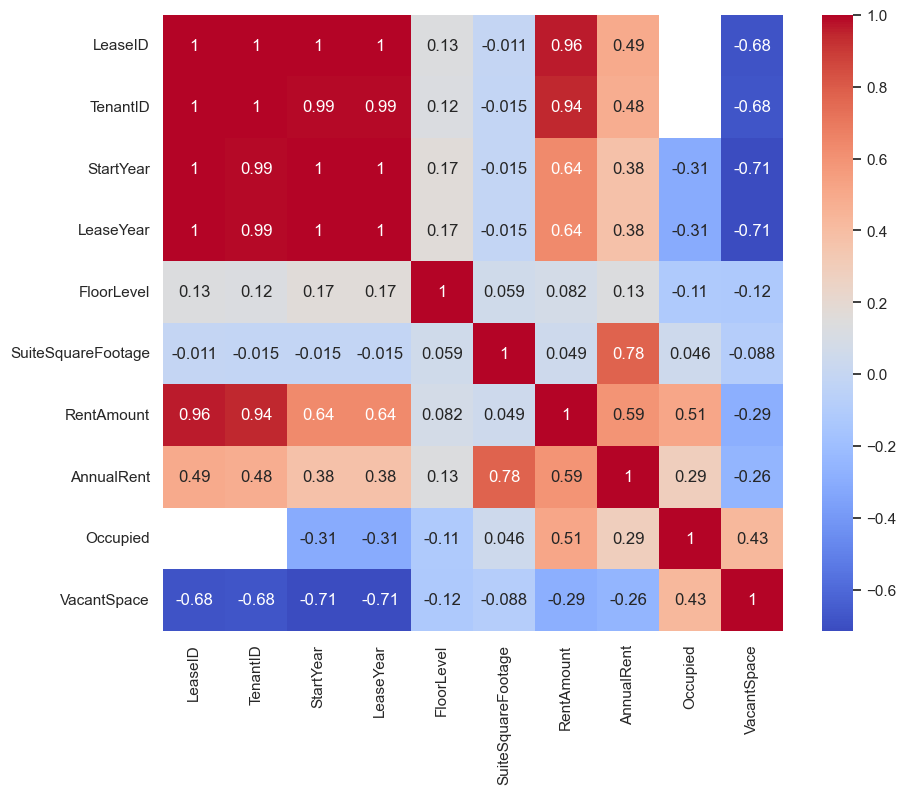

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(leases_df.corr(), annot=True, cmap='coolwarm')

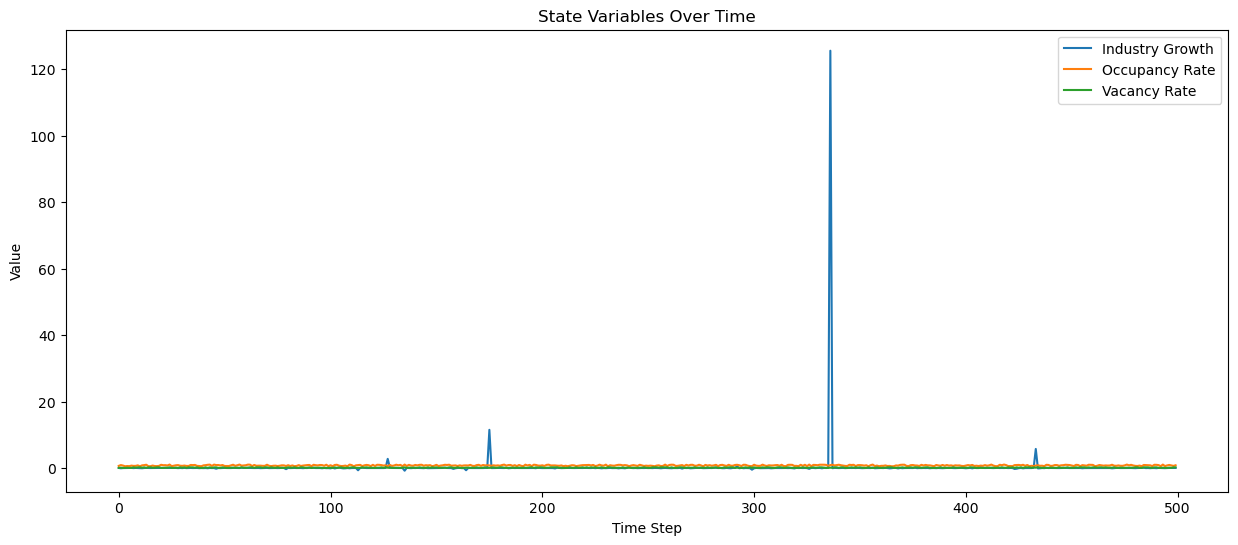

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(state_df.index, state_df['IndustryGrowth'], label='Industry Growth')
plt.plot(state_df.index, state_df['OccupancyRate'], label='Occupancy Rate')
plt.plot(state_df.index, state_df['VacancyRate'], label='Vacancy Rate')
plt.title('State Variables Over Time')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()


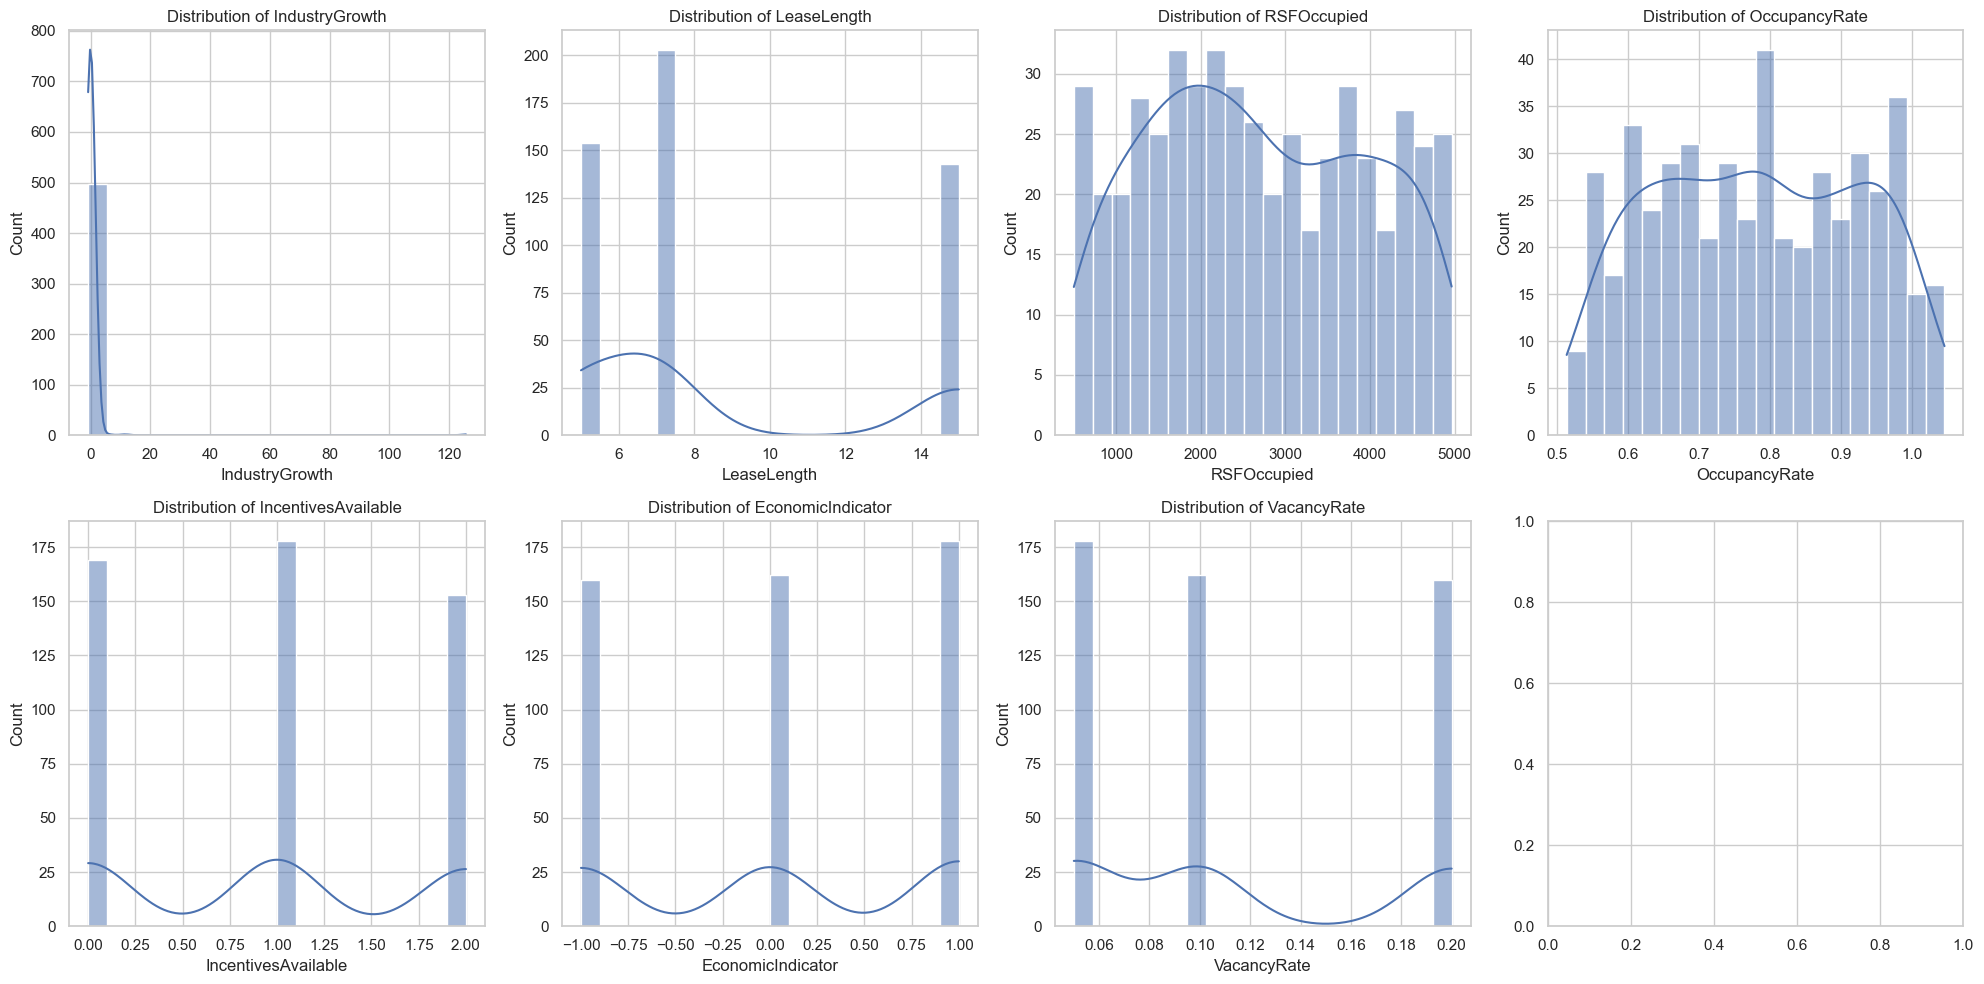

In [25]:
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
state_vars = ['IndustryGrowth', 'LeaseLength', 'RSFOccupied', 'OccupancyRate',
              'IncentivesAvailable', 'EconomicIndicator', 'VacancyRate']

for var, ax in zip(state_vars, axes.flatten()):
    sns.histplot(state_df[var], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)

plt.tight_layout()
plt.show()


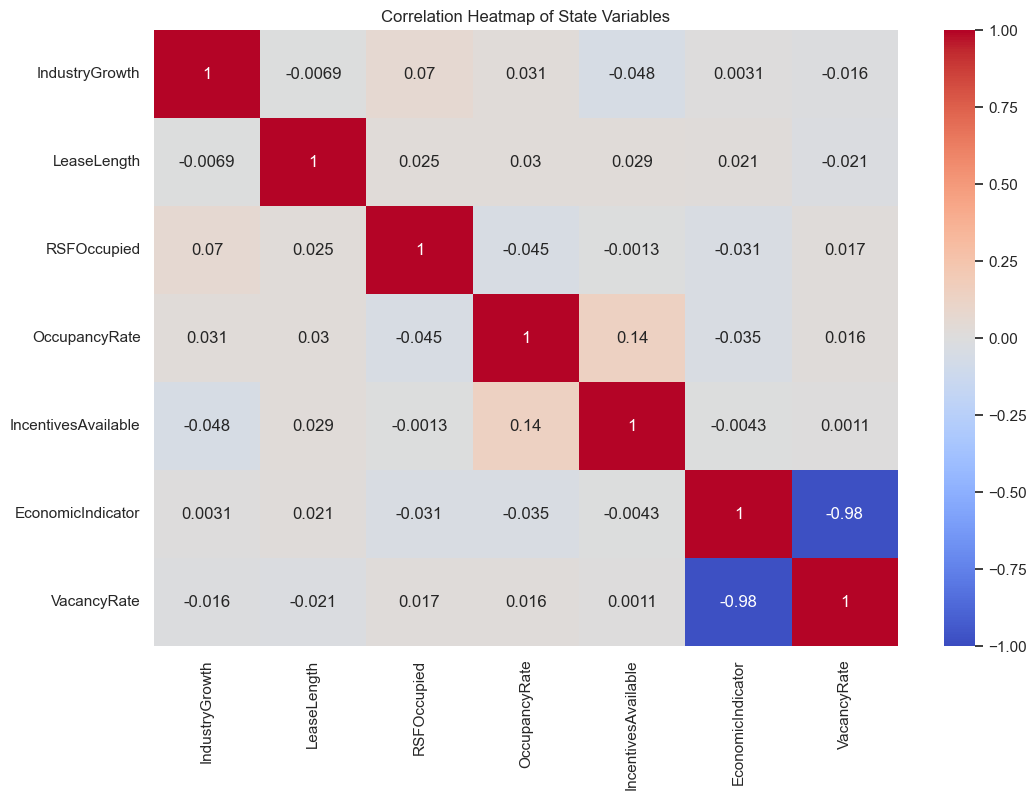

In [26]:
# Calculate correlation matrix
corr_matrix = state_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of State Variables')
plt.show()


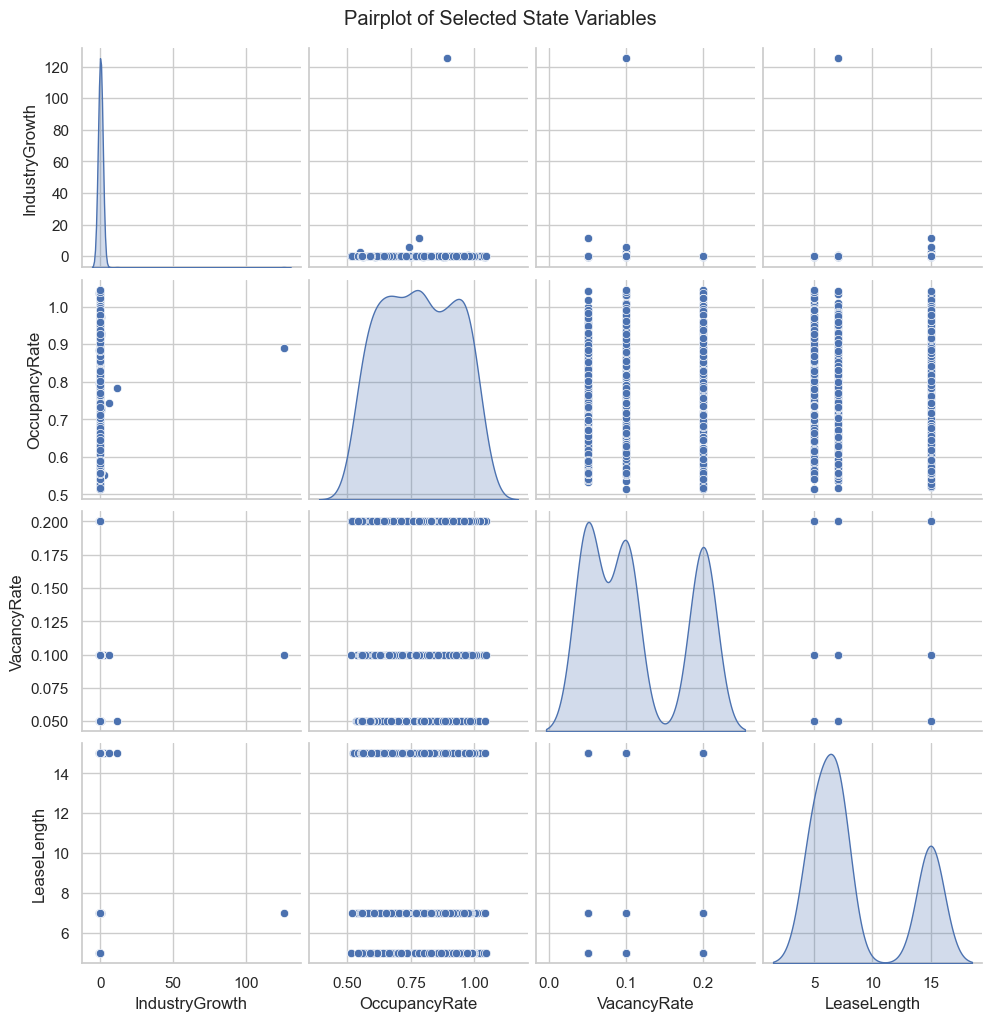

In [27]:
# Select key variables for the pairplot
selected_vars = ['IndustryGrowth', 'OccupancyRate', 'VacancyRate', 'LeaseLength']

# Plot pairplot
sns.pairplot(state_df[selected_vars], diag_kind='kde')
plt.suptitle('Pairplot of Selected State Variables', y=1.02)
plt.show()


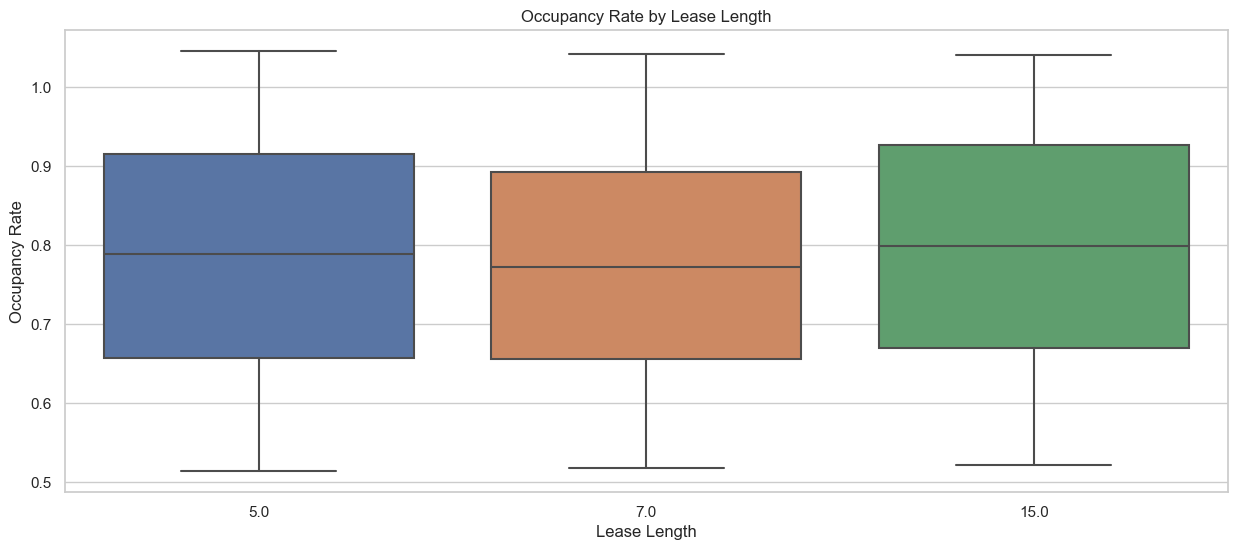

In [28]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=state_df, x='LeaseLength', y='OccupancyRate')
plt.title('Occupancy Rate by Lease Length')
plt.xlabel('Lease Length')
plt.ylabel('Occupancy Rate')
plt.show()


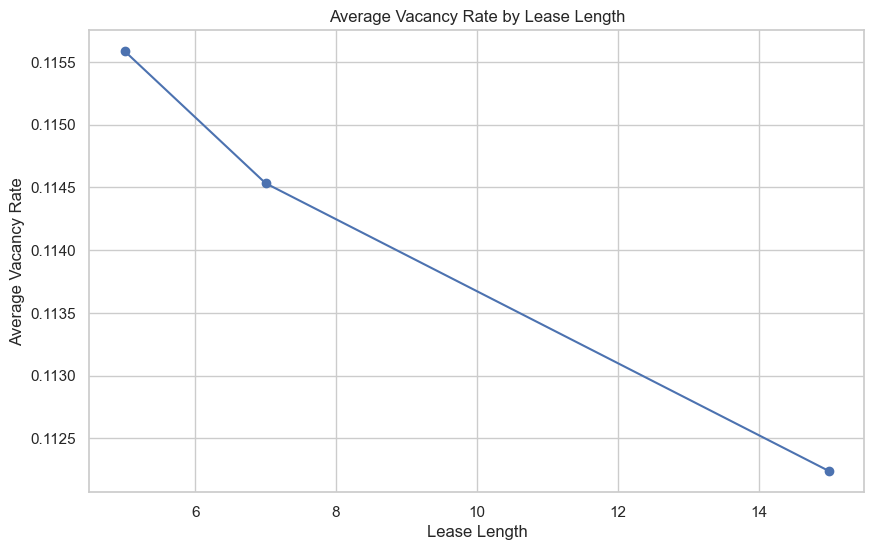

In [29]:
avg_vacancy_by_lease = state_df.groupby('LeaseLength')['VacancyRate'].mean()

plt.figure(figsize=(10, 6))
avg_vacancy_by_lease.plot(kind='line', marker='o')
plt.title('Average Vacancy Rate by Lease Length')
plt.xlabel('Lease Length')
plt.ylabel('Average Vacancy Rate')
plt.grid(True)
plt.show()


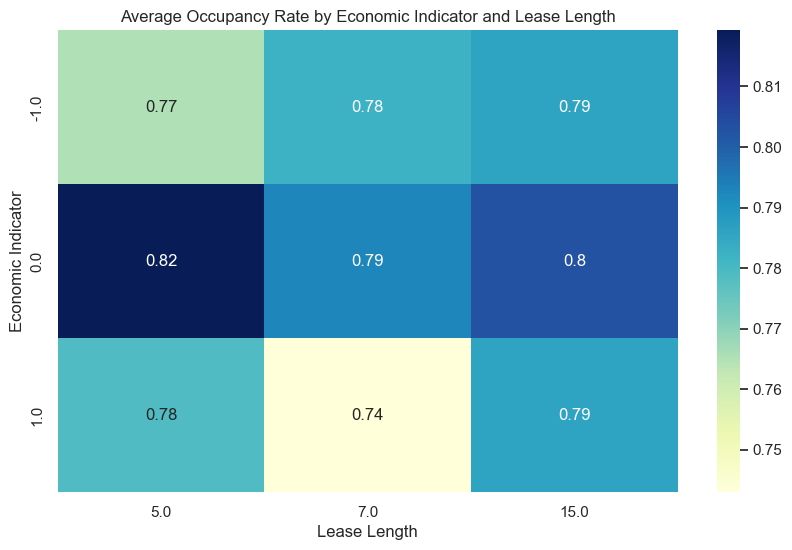

In [30]:
# Pivot table of occupancy rate by economic indicator and lease length
occupancy_heatmap = state_df.pivot_table(values='OccupancyRate', 
                                         index='EconomicIndicator', 
                                         columns='LeaseLength', 
                                         aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(occupancy_heatmap, annot=True, cmap='YlGnBu')
plt.title('Average Occupancy Rate by Economic Indicator and Lease Length')
plt.xlabel('Lease Length')
plt.ylabel('Economic Indicator')
plt.show()
